## **Application of Deep Neural Network on Apple’s Siri Voice Detection**


MIS 64061 - Final Project - Tejasvini Mavuleti

**Summary**

In this assignment, I used a TensorFlow Speech Recognition dataset to test and present the application of DNN in Apple's Siri Voice Detection. The main problem I addressed was the accuracy of the wake word - "Hey Siri" and the underlying process of transforming a soundwave to an acoustic model. From what I found, the solution was to preprocess the audio inputs and remove the outliers like background noise, misspelled words, and grammatical errors. My contribution to this project is to understand and explain the role of Siri and its acoustic patterns in trigger voice detection. 

Understanding

Apple's "Hey Siri" feature allows users to invoke Siri as a hands-free feature. A small speech recognizer runs all the time and listens for just these two words and gives answers to every topic under the sky. When it detects "Hey Siri," the rest of Siri parses the following speech as a command or query. The "Hey Siri" detector uses a Deep Neural Network (DNN) to convert the acoustic pattern of your voice at each instant into a probability distribution over speech sounds:

1.	I worked on how it uses a temporal integration process to compute a confidence score that your phrase was "Hey Siri." If the score is high enough, Siri wakes up.
2.	I explored ways to detect gender, language, and users' most frequent questions.
3.	I tested the underlying technology, which can show more about machine learning than just speech recognition, and explained their importance in this project. 


**PROBLEM - TRIGGER WORD DETECTION USING APPLE SIRI**

Let us start off by testing Siri with a trigger word "Hey Sir"


**Try Siri**

In [ ]:
!pip install pyttsx3
import pyttsx3
!pip install SpeechRecognition
!pip install wikipedia
import wikipedia
import webbrowser
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 37.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=0ff738d0453a5bdab601c473d8b905d2b3b52c82b206a3bdd7b1ae3f9c8bb3bd
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [ ]:
!pip install gtts
from gtts import gTTS 
from IPython.display import Audio 
tts = gTTS('Hey Siri, wish everyone good luck on their finals') 
tts.save('1.wav') 
sound_file = '1.wav'
Audio(sound_file, autoplay=True) 


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: click
    Found existing installation: click 8.0.4
    Uninstalling click-8.0.4:
      Successfully uninstalled click-8.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.21.6 which is incompatible.
tensorflow 2.6.4 requires six~=1

**Using Tensorflow Speech Recognition Dataset from Kaggle Competition**

Import data

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tejasvinimavuleti","key":"af28d202790b83b9a9ce46cbc6f1fc0d"}'}

In [ ]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tensorflow-speech-recognition-challenge/link_to_gcp_credits_form.txt
/kaggle/input/tensorflow-speech-recognition-challenge/test.7z
/kaggle/input/tensorflow-speech-recognition-challenge/sample_submission.7z
/kaggle/input/tensorflow-speech-recognition-challenge/train.7z


**Trigger word detection**

In [ ]:
!pip install gtts
from gtts import gTTS 
from IPython.display import Audio 
tts = gTTS('Hello everyone, just wanted to wish you good luck on your finals') 
tts.save('2.wav') 
sound_file = '2.wav'
Audio(sound_file, autoplay=True) 


In [ ]:
import csv
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install pyunpack 
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 3.1 MB/s eta 0:00:00


In [ ]:
os.makedirs("./data", exist_ok=True)

In [ ]:
from pyunpack import Archive

Archive("../input/tensorflow-speech-recognition-challenge/train.7z").extractall("./data")
#Archive("../input/tensorflow-speech-recognition-challenge/test.7z").extractall("./")

Training the data set

In [ ]:
train_dir = "./data/train/audio/"

classes = os.listdir(train_dir)
classes.remove("_background_noise_")
classes

['zero',
 'right',
 'one',
 'stop',
 'two',
 'cat',
 'four',
 'on',
 'bird',
 'happy',
 'bed',
 'five',
 'left',
 'seven',
 'no',
 'off',
 'marvin',
 'dog',
 'wow',
 'go',
 'eight',
 'tree',
 'nine',
 'yes',
 'down',
 'sheila',
 'six',
 'three',
 'house',
 'up']

In [ ]:
%%bash
mv ./data/train/audio/_background_noise_ ./data/train
ls ./data/train/audio

bed
bird
cat
dog
down
eight
five
four
go
happy
house
left
marvin
nine
no
off
on
one
right
seven
sheila
six
stop
three
tree
two
up
wow
yes
zero


In the next step, we split the data into a list of array into chunk and test them

In [ ]:
def split_arr(arr):
    """
    split an array into chunks of length 16000
    Returns:
        list of arrays
    """
    return np.split(arr, np.arange(16000, len(arr), 16000))
    
    

In [ ]:
import soundfile as sf

def create_silence():
    """
    reads wav files in background noises folder, 
    splits them and saves to silence folder in train_dir
    """
    for file in os.listdir("./data/train/_background_noise_/"):
        if ".wav" in file:
            sig, sr = librosa.load("./data/train/_background_noise_/"+file, sr = 16000) 
            sig_arr = split_arr(sig)
            if not os.path.exists(train_dir+"silence/"):
                os.makedirs(train_dir+"silence/")
            for ind, arr in enumerate(sig_arr):
                file_name = "frag%d" %ind + "_%s" %file 
                sf.write(train_dir+"silence/"+file_name, arr, 16000)
  

Now, we go ahead to remove all the background noise

In [ ]:
create_silence()

In [ ]:
folders = os.listdir(train_dir)
all_classes = [x for x in classes]
for ind, cl in enumerate(folders):
    if cl not in classes:
        all_classes.append(cl)
print(all_classes)

['zero', 'right', 'one', 'stop', 'two', 'cat', 'four', 'on', 'bird', 'happy', 'bed', 'five', 'left', 'seven', 'no', 'off', 'marvin', 'dog', 'wow', 'go', 'eight', 'tree', 'nine', 'yes', 'down', 'sheila', 'six', 'three', 'house', 'up', 'silence']


In [ ]:
with open("./data/train/validation_list.txt") as val_list:
    validation_list = [row[0] for row in csv.reader(val_list)]
assert len(validation_list) == 6798, "Validation files not loaded"
    

In [ ]:
with open("./data/train/testing_list.txt") as val_list:
    validation_list = [row[0] for row in csv.reader(val_list)]
assert len(validation_list) == 6835, "testing files not loaded"
    

In [ ]:
#validation_list.extend(testing_list)

In [ ]:
# add silence files to validation_list
for i, file in enumerate(os.listdir(train_dir+"silence/")):
    if i%10 == 0:
        validation_list.append("silence/"+file)

In [ ]:
training_list  = []
all_files_list = []
class_counts = {}

for folder in folders:
    files = os.listdir(train_dir+folder)
    for i, f in enumerate(files):
        all_files_list.append(folder+"/"+f)
        path = folder+'/'+f
        if path not in validation_list:
            training_list .append(folder+'/'+f)
        class_counts[folder] = i


validation_list = list(set(validation_list).intersection(all_files_list))

In [ ]:
assert len(validation_list) + len(training_list) == len(all_files_list), "Not All files splitted"

In [ ]:
# Adding a file name
print(training_list[345], "Size training set: ", len(training_list), 'size validation set: ', len(validation_list))

zero/7d149b38_nohash_0.wav Size training set:  58247 size validation set:  6876


In [ ]:
print(class_counts)

{'zero': 2375, 'right': 2366, 'one': 2369, 'stop': 2379, 'two': 2372, 'cat': 1732, 'four': 2371, 'on': 2366, 'bird': 1730, 'happy': 1741, 'bed': 1712, 'five': 2356, 'left': 2352, 'seven': 2376, 'no': 2374, 'off': 2356, 'marvin': 1745, 'dog': 1745, 'silence': 401, 'wow': 1744, 'go': 2371, 'eight': 2351, 'tree': 1732, 'nine': 2363, 'yes': 2376, 'down': 2358, 'sheila': 1733, 'six': 2368, 'three': 2355, 'house': 1749, 'up': 2374}


Plot the sound waves from the training data

Min:  -0.1182251 
Max:  0.10827637 
Mean:  7.842428e-06 
Median:  0.0 
Variance:  0.0003236237 
Length:  10923


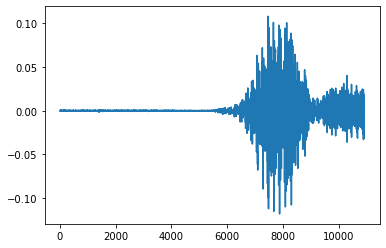

In [ ]:
x, r = librosa.load(train_dir+"yes/bfdb9801_nohash_0.wav", sr=16000)

print("Min: ", np.min(x), 
      "\nMax: ", np.max(x),
      "\nMean: ", np.mean(x),
      "\nMedian: ", np.median(x),
      "\nVariance: ", np.var(x),
      "\nLength: ", len(x),)
plt.plot(x)

This is an important step where we transform all wav files into spectrograms


**Wav to spectrograms**

In [ ]:
def make_spec(file, file_dir=train_dir, flip=False, ps=False, st = 4):
    """
    create a melspectrogram from the amplitude of the sound
    
    Args:
        file (str): filename
        file_dir (str): directory path
        flip (bool): reverse time axis
        ps (bool): pitch shift
        st (int): half-note steps for pitch shift
    Returns:
        np.array with shape (122,85) (time, freq)
    """
    
    sig, sr = librosa.load(file_dir+file, sr=16000)
    
    if len(sig) < 16000: #pad shorter than 1 sec audio with ramp to zero
        sig = np.pad(sig, (0,16000-len(sig)), "linear_ramp")
        
    if ps:
        sig = librosa.effects.pitch_shift(sig, rate, st)
        
    D = librosa.amplitude_to_db(librosa.stft(sig[:16000], 
                                             n_fft=512, 
                                             hop_length=128,
                                             center=False),
                               ref=np.max)
    S = librosa.feature.melspectrogram(S=D, n_mels=85).T
    
    if flip:
        S = np.flipud(S)
    
    return S.astype(np.float32)

/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


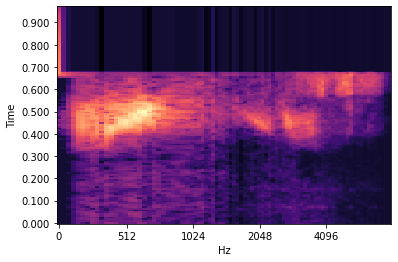

In [ ]:
librosa.display.specshow(make_spec("yes/bfdb9801_nohash_0.wav"),
                         x_axis="mel",
                         fmax=8000,
                         y_axis="time",
                         sr=16000,
                         hop_length=128)

This image shows us the spectrogram with backgound noise. 

In [ ]:
make_spec('yes/bfdb9801_nohash_0.wav').shape

(122, 85)

In [ ]:
def create_sets(file_list=training_list):
    X_array = np.zeros([len(file_list), 122, 85])
    y_array = np.zeros([len(file_list)])
    for ind, file in enumerate(file_list):
        if ind%2000 == 0:
            print(ind, file)
        try:
            X_array[ind] = make_spec(file)
        except ValueError:
            print(ind, file, ValueError)
        y_array[ind] = all_classes.index(file.rsplit('/')[0])
        
    return X_array, y_array

In [ ]:
X_train, y_train = create_sets() # takes a while

0 zero/1aed7c6d_nohash_1.wav
2000 zero/b5935410_nohash_0.wav
4000 right/7b2e879e_nohash_0.wav
6000 one/7c1d8533_nohash_4.wav
8000 stop/5ac04a92_nohash_2.wav
10000 two/c948d727_nohash_0.wav
12000 cat/a6285644_nohash_0.wav
14000 four/d8a5ace5_nohash_2.wav
16000 on/5b09db89_nohash_2.wav
18000 happy/d6b155a5_nohash_0.wav
20000 bed/eb67fcbc_nohash_1.wav
22000 five/f5e44d34_nohash_0.wav
24000 left/591d32f3_nohash_2.wav
26000 seven/07363607_nohash_1.wav
28000 no/bd061bef_nohash_0.wav
30000 off/f550b7dc_nohash_0.wav
32000 marvin/b8b8cb52_nohash_0.wav
34000 dog/c6ee87a7_nohash_0.wav
36000 wow/e269bac0_nohash_0.wav
38000 go/4a1e736b_nohash_0.wav
40000 eight/e54a0f16_nohash_2.wav
42000 tree/15b0c947_nohash_0.wav
44000 nine/b7a0754f_nohash_2.wav
46000 yes/7cfb1618_nohash_0.wav
48000 down/627c0bec_nohash_0.wav
50000 sheila/9beccfc8_nohash_5.wav
52000 six/3c8836dc_nohash_1.wav
54000 three/14775481_nohash_0.wav
56000 house/0f3f64d5_nohash_2.wav
58000 up/9ff2d2f4_nohash_2.wav


In [ ]:
X_train.shape

(58247, 122, 85)

In [ ]:
y_train.shape

(58247,)

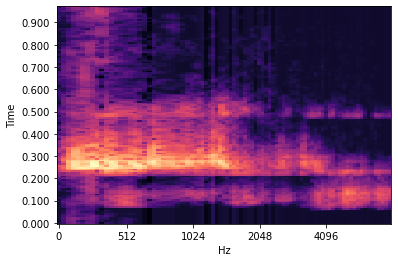

In [ ]:
librosa.display.specshow(X_train[6500],
                         x_axis="mel",
                         fmax=8000,
                         y_axis="time",
                         sr=16000,
                         hop_length=128)

After we split and trained our model, this is our resulting spectrogram with no backgound noise. 

**Results** 

In [ ]:
print('min: ',np.min(X_train), 
      '\nmax: ', np.max(X_train), 
      '\nmean: ', np.mean(X_train),
      '\nmedian: ', np.median(X_train),
      '\nvariance: ', np.var(X_train))

min:  -2.0306179523468018 
max:  9.682740653715882e-08 
mean:  -1.3101563957702722 
median:  -1.3613563776016235 
variance:  0.19692255618706744


(array([ 1251138.,   144083.,  3306116.,  7617121., 83278030., 22882324.,
        16926972., 16956260., 16192538., 16469321., 16947565., 17438982.,
        17922963., 18298659., 18586245., 18765172., 18836475., 18790651.,
        18602778., 18276886., 17793759., 17178653., 16457377., 15673285.,
        14850121., 14004353., 13154327., 12300111., 11479942., 10683257.,
         9921708.,  9194920.,  8508350.,  7873520.,  7277130.,  6733382.,
         6233301.,  5760870.,  5295126.,  4830003.,  4353549.,  3874699.,
         3364470.,  2818379.,  2258951.,  1735177.,  1294834.,   860607.,
          524847.,   242103.]),
 array([-2.03061795e+00, -1.99000559e+00, -1.94939323e+00, -1.90878087e+00,
        -1.86816851e+00, -1.82755615e+00, -1.78694379e+00, -1.74633143e+00,
        -1.70571906e+00, -1.66510670e+00, -1.62449434e+00, -1.58388198e+00,
        -1.54326962e+00, -1.50265726e+00, -1.46204490e+00, -1.42143254e+00,
        -1.38082018e+00, -1.34020782e+00, -1.29959545e+00, -1.25898309e+

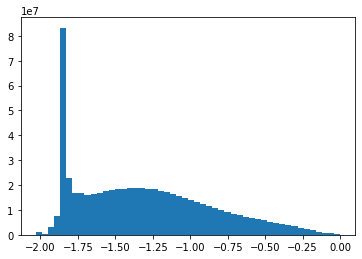

In [ ]:
plt.hist(X_train.flatten(), bins=50)

In [ ]:
np.save("./data/X_train.npy", np.expand_dims(X_train, -1)+1.3)
np.save("./data/y_train.npy", y_train.astype(np.int))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
X_val, y_val = create_sets(file_list=validation_list)

0 one/9a69672b_nohash_3.wav
2000 one/37dca74f_nohash_0.wav
4000 five/47d01978_nohash_0.wav
6000 yes/6205088b_nohash_0.wav


(array([ 132498.,   19144.,  380554.,  873339., 9733686., 2833241.,
        2136306., 2134273., 2062179., 2103124., 2149632., 2189434.,
        2215780., 2230738., 2232242., 2220373., 2205009., 2176033.,
        2143241., 2093359., 2031862., 1958813., 1873962., 1780748.,
        1689165., 1595423., 1501813., 1405693., 1311710., 1219545.,
        1130073., 1044960.,  965609.,  892848.,  828463.,  768628.,
         713957.,  663826.,  609529.,  554969.,  502004.,  448012.,
         393101.,  332010.,  267358.,  206991.,  156143.,  103280.,
          63363.,   26077.]),
 array([-2.03061795e+00, -1.99000559e+00, -1.94939323e+00, -1.90878087e+00,
        -1.86816851e+00, -1.82755615e+00, -1.78694379e+00, -1.74633143e+00,
        -1.70571906e+00, -1.66510670e+00, -1.62449434e+00, -1.58388198e+00,
        -1.54326962e+00, -1.50265726e+00, -1.46204490e+00, -1.42143254e+00,
        -1.38082018e+00, -1.34020782e+00, -1.29959545e+00, -1.25898309e+00,
        -1.21837073e+00, -1.17775837e+00, -1.1

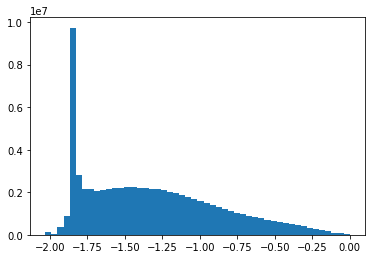

In [ ]:
plt.hist(X_val.flatten(), bins=50)

In [ ]:
np.save('data/X_val.npy', np.expand_dims(X_val, -1)+1.3)
np.save('data/y_val.npy', y_val.astype(np.int))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
%reset -f

**Resetting the model and testing using Keras**

In [ ]:
import numpy as np
import os

In [ ]:
train_dir = "./data/train/audio/"

X_train = np.load("./data/X_train.npy")
y_train = np.load("./data/y_train.npy")

X_val = np.load("./data/X_val.npy")
y_val = np.load("./data/y_val.npy")

In [ ]:
X_train.shape

(58247, 122, 85, 1)

In [ ]:
X_train = X_train.reshape((-1, X_train.shape[1], X_train.shape[2]))
X_val = X_val.reshape((-1, X_val.shape[1], X_val.shape[2]))

In [ ]:
classes = os.listdir(train_dir)
classes

['zero',
 'right',
 'one',
 'stop',
 'two',
 'cat',
 'four',
 'on',
 'bird',
 'happy',
 'bed',
 'five',
 'left',
 'seven',
 'no',
 'off',
 'marvin',
 'dog',
 'silence',
 'wow',
 'go',
 'eight',
 'tree',
 'nine',
 'yes',
 'down',
 'sheila',
 'six',
 'three',
 'house',
 'up']

In [ ]:
from collections import Counter

def get_class_weights(y):
    counter = Counter(y)
    majority = max(counter.values())
    return {cls: float(majority/count) for cls, count in counter.items()}

class_weights = get_class_weights(y_train)
class_weights

{0: 1.0056444026340545,
 1: 1.0142314990512333,
 2: 1.0075400565504242,
 3: 1.003284842796809,
 4: 1.013750592697961,
 5: 1.3643905552010211,
 6: 1.0089664936290703,
 7: 1.008015087223008,
 8: 1.3591862682771774,
 9: 1.3687580025608195,
 10: 1.391021470396877,
 11: 1.024928092042186,
 12: 1.024928092042186,
 13: 1.0,
 14: 1.0070654733867168,
 15: 1.020525059665871,
 16: 1.3497474747474747,
 17: 1.3652618135376755,
 30: 5.922437673130194,
 18: 1.3531645569620254,
 19: 1.008015087223008,
 20: 1.020525059665871,
 21: 1.3883116883116884,
 22: 1.0156769596199524,
 23: 1.008015087223008,
 24: 1.0151946818613484,
 25: 1.3811369509043927,
 26: 1.0061176470588236,
 27: 1.0234561991383437,
 28: 1.33625,
 29: 1.016642891107941}

In [ ]:
NB_CLASSES = len(classes)

In [ ]:
def convert_list_dict(lst):
    res_dct = {i: val for i, val in enumerate(lst)}
    return res_dct
         
classes_index = convert_list_dict(classes)
classes_index

{0: 'zero',
 1: 'right',
 2: 'one',
 3: 'stop',
 4: 'two',
 5: 'cat',
 6: 'four',
 7: 'on',
 8: 'bird',
 9: 'happy',
 10: 'bed',
 11: 'five',
 12: 'left',
 13: 'seven',
 14: 'no',
 15: 'off',
 16: 'marvin',
 17: 'dog',
 18: 'silence',
 19: 'wow',
 20: 'go',
 21: 'eight',
 22: 'tree',
 23: 'nine',
 24: 'yes',
 25: 'down',
 26: 'sheila',
 27: 'six',
 28: 'three',
 29: 'house',
 30: 'up'}

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=NB_CLASSES)
y_val = to_categorical(y_val, num_classes=NB_CLASSES)

In [ ]:
!pip install livelossplot

In [ ]:
from keras.layers import Conv1D, MaxPool1D, Concatenate, BatchNormalization, Activation, Input, Add, \
                         GlobalAveragePooling1D, Dense
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from livelossplot import PlotLossesKeras
from tensorflow.keras.metrics import Recall, Precision
import keras
import time

In [ ]:
import keras.backend as K

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

Let us try using classifier inception and assign weights

In [ ]:
class Classifier_INCEPTION:
    def __init__(self, weights_directory, input_shape, nb_classes, verbose=False, build=True, batch_size=64,
                 nb_filters=32, use_residual=True, use_bottleneck=True, depth=10, kernel_size=41, nb_epochs=100):
        self.weights_directory = weights_directory
        self.nb_filters = nb_filters
        self.use_residual = use_residual
        self.use_bottleneck = use_bottleneck
        self.depth = depth
        self.kernel_size = kernel_size - 1
        self.callbacks = None
        self.batch_size = batch_size
        self.bottleneck_size = 32
        self.nb_epochs = nb_epochs

        if build == True:
            self.model = self.build_model(input_shape, nb_classes)
            if (verbose == True):
                self.model.summary()
            self.verbose = verbose

    def _inception_module(self, input_tensor, stride=1, activation='linear'):

        if self.use_bottleneck and int(input_tensor.shape[-1]) > 1:
            input_inception = Conv1D(filters=self.bottleneck_size, kernel_size=1,
                                     padding='same', activation=activation, use_bias=False)(input_tensor)
        else:
            input_inception = input_tensor

        kernel_size_s = [self.kernel_size // (2 ** i) for i in range(3)]

        conv_list = []

        for i in range(len(kernel_size_s)):
            conv_list.append(Conv1D(filters=self.nb_filters, kernel_size=kernel_size_s[i],
                                    strides=stride, padding='same', activation=activation, use_bias=False)(
                input_inception))

        max_pool_1 = MaxPool1D(pool_size=3, strides=stride, padding='same')(input_tensor)

        conv_6 = Conv1D(filters=self.nb_filters, kernel_size=1,
                        padding='same', activation=activation, use_bias=False)(max_pool_1)

        conv_list.append(conv_6)

        x = Concatenate(axis=2)(conv_list)
        x = BatchNormalization()(x)
        x = Activation(activation='relu')(x)
        return x

    def _shortcut_layer(self, input_tensor, out_tensor):
        shortcut_y = Conv1D(filters=int(out_tensor.shape[-1]), kernel_size=1,
                            padding='same', use_bias=False)(input_tensor)
        shortcut_y = BatchNormalization()(shortcut_y)

        x = Add()([shortcut_y, out_tensor])
        x = Activation('relu')(x)
        return x

    def build_model(self, input_shape, nb_classes):
        input_layer = Input(input_shape)

        x = input_layer
        input_res = input_layer

        for d in range(self.depth):

            x = self._inception_module(x)

            if self.use_residual and d % 3 == 2:
                x = self._shortcut_layer(input_res, x)
                input_res = x

        gap_layer = GlobalAveragePooling1D()(x)

        output_layer = Dense(nb_classes, activation='softmax')(gap_layer)

        model = Model(inputs=input_layer, outputs=output_layer)

        model.compile(loss='categorical_crossentropy', 
                      optimizer=Adam(),
                      metrics=['accuracy', Precision(), Recall(), f1_score])

        reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                      factor=0.5, 
                                      patience=int(self.nb_epochs/20),
                                      min_lr=0.0001)
        
        file_path = os.path.join(self.weights_directory,"best_weights.h5")
        model_checkpoint = ModelCheckpoint(filepath=file_path, 
                                           monitor='val_accuracy',
                                           mode="max",
                                           save_best_only=True)
        
        early_stopping = EarlyStopping(monitor="val_accuracy", 
                                       mode="max", 
                                       verbose=1, 
                                       patience=int(self.nb_epochs/10))
        plotlosses = PlotLossesKeras()
        self.callbacks = [reduce_lr, model_checkpoint, early_stopping, plotlosses]
        return model

    def fit(self, x_train, y_train, x_val, y_val, class_weights=None):       
        if self.batch_size is None:
            mini_batch_size = int(min(x_train.shape[0] / 10, 16))
        else:
            mini_batch_size = self.batch_size

        start_time = time.time()
        hist = self.model.fit(x_train, y_train, 
                              batch_size=mini_batch_size, 
                              epochs=self.nb_epochs,
                              verbose=self.verbose, 
                              validation_data=(x_val, y_val), 
                              callbacks=self.callbacks)
        
        duration = time.time() - start_time
        keras.backend.clear_session()
        print("Model take {} S to train ".format(duration))
        return hist

In [ ]:
INPUT_SHAPE = X_train.shape[1:]
BATCH_SIZE = 64

I am using the Convolution 1D layer

In [ ]:
WEIGHTS_DIR = "./"
inception = Classifier_INCEPTION(WEIGHTS_DIR, INPUT_SHAPE, NB_CLASSES, 1, batch_size=BATCH_SIZE, build=True)

2022-12-13 13:27:13.021089: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-13 13:27:13.145623: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-13 13:27:13.146435: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-13 13:27:13.148151: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 122, 85)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 122, 32)      2720        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 122, 85)      0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 122, 32)      40960       conv1d[0][0]                     
______________________________________________________________________________________________

Results for the accuracy, precision and recall of the sound waves 

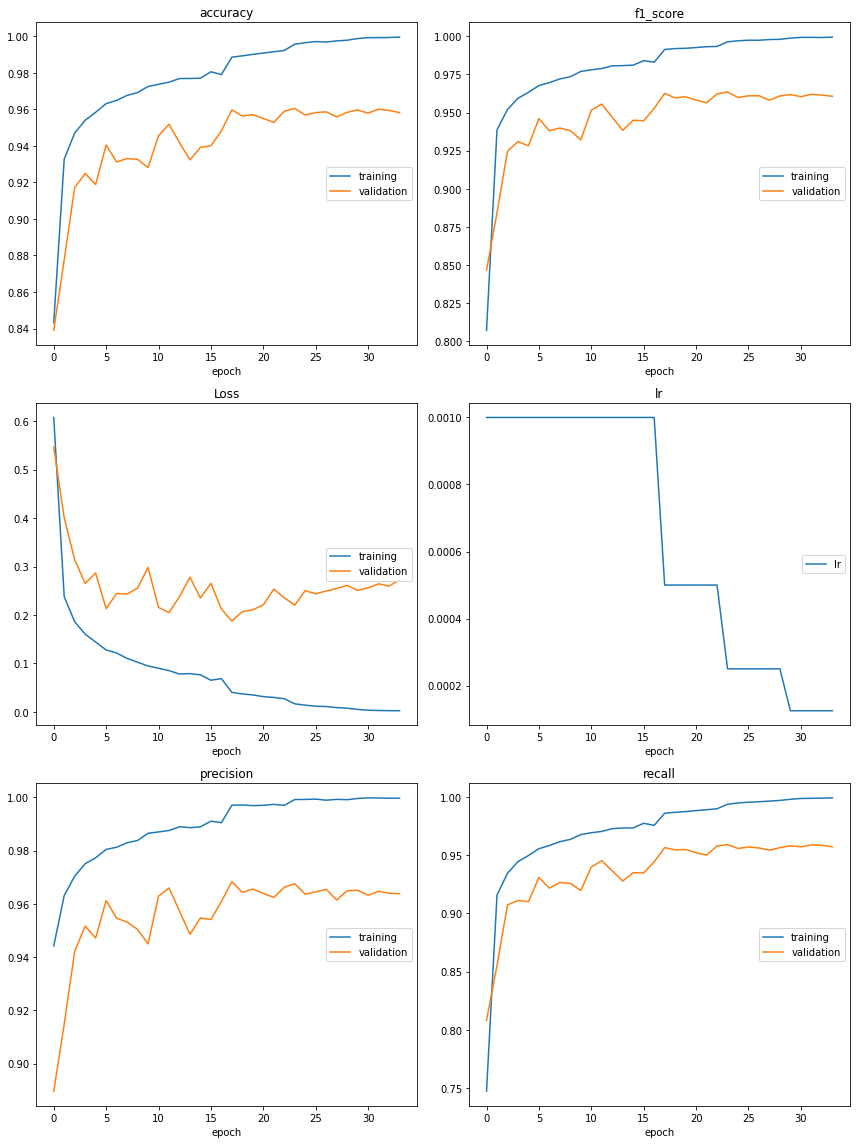

accuracy
	training         	 (min:    0.843, max:    1.000, cur:    1.000)
	validation       	 (min:    0.839, max:    0.961, cur:    0.958)
f1_score
	training         	 (min:    0.807, max:    1.000, cur:    1.000)
	validation       	 (min:    0.847, max:    0.963, cur:    0.961)
Loss
	training         	 (min:    0.003, max:    0.607, cur:    0.003)
	validation       	 (min:    0.187, max:    0.547, cur:    0.273)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
precision
	training         	 (min:    0.944, max:    1.000, cur:    1.000)
	validation       	 (min:    0.890, max:    0.968, cur:    0.964)
recall
	training         	 (min:    0.747, max:    0.999, cur:    0.999)
	validation       	 (min:    0.808, max:    0.959, cur:    0.957)
Epoch 00034: early stopping
Model take 1268.0002427101135 S to train 


In [ ]:
history = inception.fit(X_train, y_train, X_val, y_val)

In [ ]:
inception.model.load_weights("./best_weights.h5")

In [ ]:
inception.model.evaluate(X_val, y_val)

2022-12-13 13:54:07.685331: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 285216480 exceeds 10% of free system memory.


215/215 [==============================] - 3s 10ms/step - loss: 0.2204 - accuracy: 0.9606 - precision: 0.9676 - recall: 0.9591 - f1_score: 0.9633


[0.22040311992168427,
 0.9605875611305237,
 0.967576265335083,
 0.9591332077980042,
 0.9632858037948608]

In [ ]:
y_hat = inception.model.predict(X_val, batch_size = BATCH_SIZE, verbose = 1)

108/108 [==============================] - 2s 10ms/step


In [ ]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

def ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, n_classes):    
    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_ohe[:, i], y_hat_ohe[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
                                  
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_ohe.ravel(), y_hat_ohe.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure(figsize=(20,20))
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(list(label_encoder.keys())[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("multiclass characteristic")
    plt.legend(loc="lower right")
    plt.show()

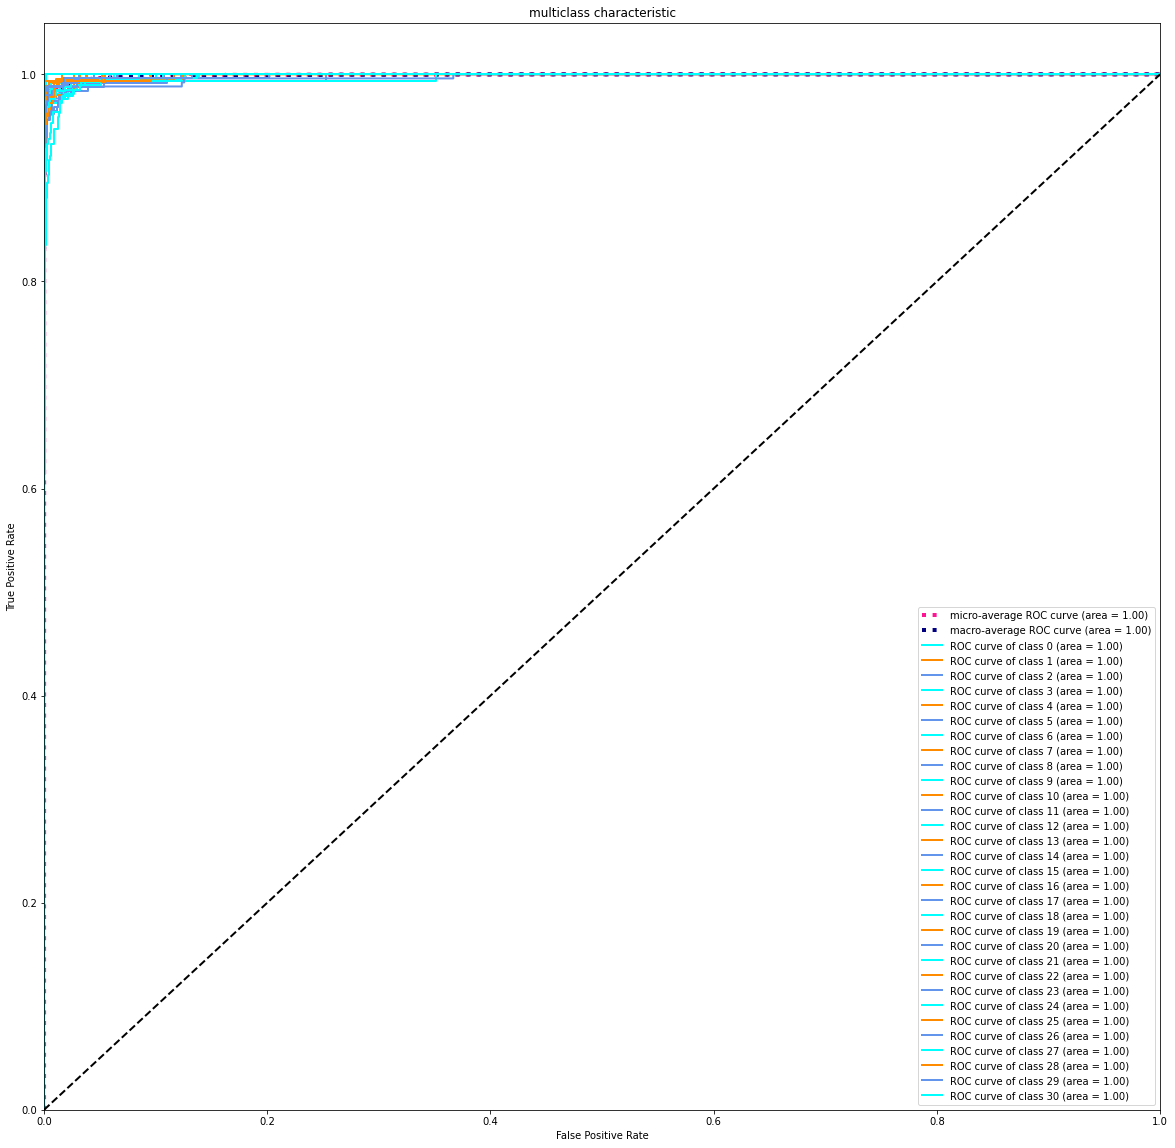

In [ ]:
ROC_plot(y_val, y_hat, classes_index, NB_CLASSES)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn
import pandas as pd


def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))

    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder],
                  columns = [i for i in label_encoder])
    plt.figure(figsize = (20,20))
    sn.heatmap(df_cm, annot=True)

    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder))

Building a confusion matrix

Accuracy:  0.960587550901687
Precision::  0.960587550901687
Recall::  0.960587550901687
F1_Score::  0.960587550901687

Macro precision_recall_fscore_support (macro) average
(0.9618466797968317, 0.9623345994818591, 0.9619895939508027, None)

Macro precision_recall_fscore_support (micro) average
(0.960587550901687, 0.960587550901687, 0.960587550901687, None)

Macro precision_recall_fscore_support (weighted) average
(0.9608001449563753, 0.960587550901687, 0.9606005497127943, None)

Confusion Matrix

Classification Report
              precision    recall  f1-score   support

        zero       0.97      0.94      0.96       250
       right       0.95      0.96      0.96       259
         one       0.94      0.92      0.93       248
        stop       1.00      0.98      0.99       249
         two       0.95      0.98      0.96       264
         cat       0.98      1.00      0.99       166
        four       0.97      0.96      0.97       253
          on       0.97      0.98      0.97

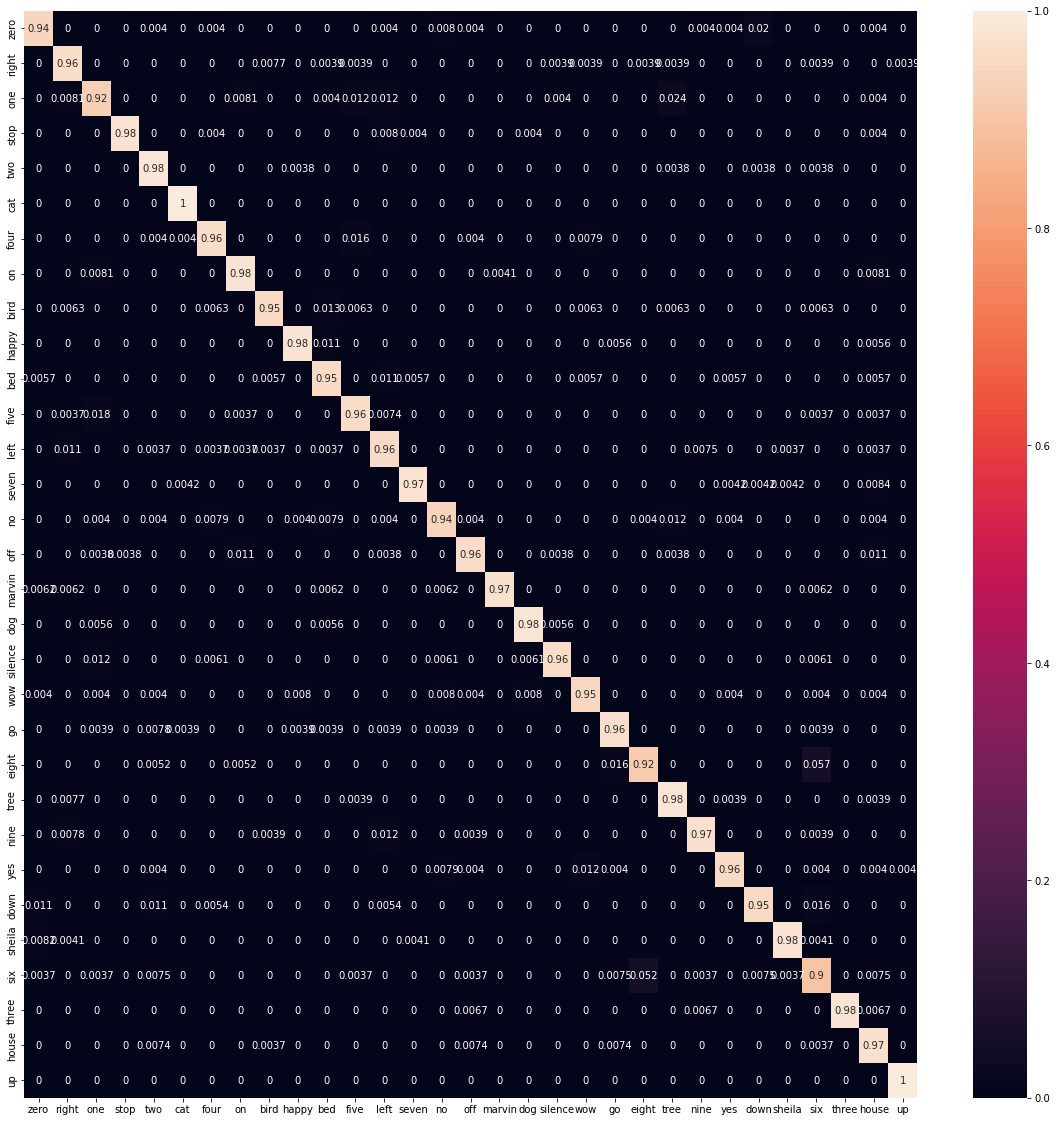

In [ ]:
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)

print_score(y_hat, y_true, classes)

In this step I will use Batch Normalization and find out if I am getting the same rsuolts like before

In [ ]:
%reset -f

In [ ]:
import numpy as np
import os

In [ ]:
train_dir = "./data/train/audio/"

X_train = np.load("./data/X_train.npy")
y_train = np.load("./data/y_train.npy")

X_val = np.load("./data/X_val.npy")
y_val = np.load("./data/y_val.npy")

In [ ]:
X_train.shape

(58247, 122, 85, 1)

In [ ]:
X_train = X_train.reshape((-1, X_train.shape[1], X_train.shape[2]))
X_val = X_val.reshape((-1, X_val.shape[1], X_val.shape[2]))

In [ ]:
classes = os.listdir(train_dir)
classes

['zero',
 'right',
 'one',
 'stop',
 'two',
 'cat',
 'four',
 'on',
 'bird',
 'happy',
 'bed',
 'five',
 'left',
 'seven',
 'no',
 'off',
 'marvin',
 'dog',
 'silence',
 'wow',
 'go',
 'eight',
 'tree',
 'nine',
 'yes',
 'down',
 'sheila',
 'six',
 'three',
 'house',
 'up']

In [ ]:
NB_CLASSES = len(classes)

In [ ]:
def convert_list_dict(lst):
    res_dct = {i: val for i, val in enumerate(lst)}
    return res_dct
         
classes_index = convert_list_dict(classes)
classes_index

{0: 'zero',
 1: 'right',
 2: 'one',
 3: 'stop',
 4: 'two',
 5: 'cat',
 6: 'four',
 7: 'on',
 8: 'bird',
 9: 'happy',
 10: 'bed',
 11: 'five',
 12: 'left',
 13: 'seven',
 14: 'no',
 15: 'off',
 16: 'marvin',
 17: 'dog',
 18: 'silence',
 19: 'wow',
 20: 'go',
 21: 'eight',
 22: 'tree',
 23: 'nine',
 24: 'yes',
 25: 'down',
 26: 'sheila',
 27: 'six',
 28: 'three',
 29: 'house',
 30: 'up'}

In [ ]:
!pip install livelossplot

In [ ]:
from keras.layers import Conv1D, BatchNormalization, Activation, Input, Dense, Bidirectional, LSTM, Dropout, TimeDistributed, Lambda
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from livelossplot import PlotLossesKeras
from tensorflow.keras.metrics import Recall, Precision
import keras
import keras.backend as K
import time

In [ ]:

char_map_str = """
<SPACE> 0
a 1
b 2
c 3
d 4
e 5
f 6
g 7
h 8
i 9
j 10
k 11
l 12
m 13
n 14
o 15
p 16
q 17
r 18
s 19
t 20
u 21
v 22
w 23
x 24
y 25
z 26
' 27
"""

char_map = {}
index_map = {}

for line in char_map_str.strip().split('\n'):
    ch, index = line.split()
    char_map[ch] = int(index)
    index_map[int(index)] = ch

index_map[0] = ' '

In [ ]:
def text_to_int(text):
    """
    takes the character map and returns a series of 
    integers for the inserted text
    the 'silence' class returns only 27's
    """
    int_seq = []
    if text == 'silence':
        for r in range(8):
            int_seq.append(27)
    else:
        for c in text:
            ch = char_map[c]
            int_seq.append(ch)
    return int_seq

In [ ]:
def get_intseq(trans, max_len = 8):
    """
    pads integer list with 27's up to max length
    """
    t = text_to_int(trans)
    while (len(t) < max_len):
        t.append(27)
    return t

In [ ]:
def get_ctc_params(y, classes_list, len_char_map = 28):
    """
    Usage:
        creates parameters required for K.ctc_batch_cost function 
    Args:
        Y (ndarray): target set with all classes
        classes_list (list): list with class names
        len_char_map (int): length of the character map
    Returns:
        3 ndarrays
    """
    labels = np.array([get_intseq(classes_list[y[l]]) for l, _ in enumerate(y)])
    input_length = np.array([len_char_map for _ in y])
    label_length = np.array([8 for _ in y])
    return labels, input_length, label_length

In [ ]:
class CTC():
    """
    Usage:
        sr_ctc = CTC(enter input_size and output_size)
        sr_ctc.build()
        sr_ctc.m.compile()
        sr_ctc.tm.compile()
    """ 
    def __init__(self, input_shape, nb_classes, weights_directory='./', nb_epochs=100, batch_size=64):
        self.input_shape = input_shape
        self.nb_classes = nb_classes
        self.weights_directory = weights_directory
        self.nb_epochs = nb_epochs
        self.batch_size = batch_size
        self.m = None
        self.tm = None    
        
        self.build()
        
    def ctc_layer_func(self, args):
        y_pred, labels, input_length, label_length = args
        return K.ctc_batch_cost(labels, y_pred, input_length, label_length)
    
    # dummy loss
    def ctc_loss(self, y_true, y_pred):
        return y_pred
        
    def build(self, conv_filters=196, conv_size=13, conv_strides=4, activation="relu", rnn_layers=2, lstm_units=128, drop_out=0.8):
        """
        build CTC training model (self.m) and 
        prediction model without the ctc loss function (self.tm)
        
        Usage: 
            enter conv parameters for Cov1D layer
            specify number of rnn layers, LSTM units and dropout
        Args:
            
        Returns:
            self.m: keras.engine.training.Model
            self.tm: keras.engine.training.Model
        """        
        
        inputs = Input(shape=self.input_shape, name='input')
        x = Conv1D(conv_filters, 
                   conv_size, 
                   strides = conv_strides, 
                   name = 'conv1d')(inputs)
        x = BatchNormalization()(x)
        x = Activation(activation)(x)
        for _ in range(rnn_layers):          
            x = Bidirectional(LSTM(lstm_units, 
                                   return_sequences = True))(x)
            x = Dropout(drop_out)(x)
            x = BatchNormalization()(x)
        outputs = TimeDistributed(Dense(self.nb_classes, activation="softmax"))(x)
        
        # ctc inputs
        labels = Input(name="the_labels", shape=[None,], dtype="int32")
        input_length = Input(name="input_length", shape=[1], dtype="int32")
        label_length = Input(name="label_length", shape=[1], dtype="int32")
        
        ctc_layer = Lambda(self.ctc_layer_func, output_shape=(1,), name="ctc")([outputs, labels, input_length, label_length])
        self.tm = Model(inputs=inputs, outputs=outputs)
        self.m = Model(inputs=[inputs,labels,input_length,label_length],
                       outputs=ctc_layer)            
        
        self.m.compile(loss=self.ctc_loss, 
                       optimizer=Adam(),
                       metrics=['accuracy'])
        
        self.tm.compile(loss=self.ctc_loss, 
                        optimizer=Adam())
              
        reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                      factor=0.5, 
                                      patience=int(self.nb_epochs/20),
                                      min_lr=0.0001)
        
        file_path = os.path.join(self.weights_directory,"ctc_best_weights.h5")
        model_checkpoint = ModelCheckpoint(filepath=file_path, 
                                           monitor='val_accuracy',
                                           mode="max",
                                           save_best_only=True)
        
        early_stopping = EarlyStopping(monitor="val_accuracy", 
                                       mode="max", 
                                       verbose=1, 
                                       patience=int(self.nb_epochs/10))
        plotlosses = PlotLossesKeras()
        self.callbacks = [reduce_lr, model_checkpoint, early_stopping, plotlosses]
     
        print(self.m.summary())
        print(self.tm.summary())
        
        return self.m, self.tm
    
    
    def fit(self, X_train, train_labels, train_input_length, train_label_length, y_train,
                  X_val, val_labels, val_input_length, val_label_length, y_val):       
        if self.batch_size is None:
            mini_batch_size = int(min(x_train.shape[0] / 10, 16))
        else:
            mini_batch_size = self.batch_size

        start_time = time.time()
        hist = sr_ctc.m.fit([np.squeeze(X_train), 
                            train_labels, 
                            train_input_length, 
                            train_label_length], 
                       np.zeros([len(y_train)]), 
                       batch_size = self.batch_size, 
                       epochs = self.nb_epochs, 
                       validation_data = ([np.squeeze(X_val), 
                                           val_labels, 
                                           val_input_length, 
                                           val_label_length],
                                          np.zeros([len(y_val)])), 
                       callbacks = self.callbacks, 
                       verbose = 1, 
                       shuffle = True)
        
        duration = time.time() - start_time
        keras.backend.clear_session()
        print("Model take {} S to train ".format(duration))
        return hist
    
    def str_out(self, dataset):
        k_ctc_out = K.ctc_decode(self.tm.predict(np.squeeze(dataset), 
                                                verbose = 1), 
                             np.array([28 for _ in dataset]))
        decoded_out = K.eval(k_ctc_out[0][0])
        str_decoded_out = []
        for i, _ in enumerate(decoded_out):     
            str_decoded_out.append("".join([index_map[c] for c in decoded_out[i] if not c == -1]))

        return str_decoded_out

In [ ]:
train_labels, train_input_length, train_label_length = get_ctc_params(y=y_train, classes_list=classes)
val_labels, val_input_length, val_label_length = get_ctc_params(y=y_val, classes_list=classes)

In [ ]:
INPUT_SHAPE = X_train.shape[1:]
BATCH_SIZE = 64

In [ ]:
WEIGHTS_DIR = "./"
sr_ctc = CTC(INPUT_SHAPE, NB_CLASSES, WEIGHTS_DIR, nb_epochs=100, batch_size=BATCH_SIZE)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 122, 85)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 28, 196)      216776      input[0][0]                      
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 196)      784         conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 28, 196)      0           batch_normalization[0][0]        
____________________________________________________________________________________________

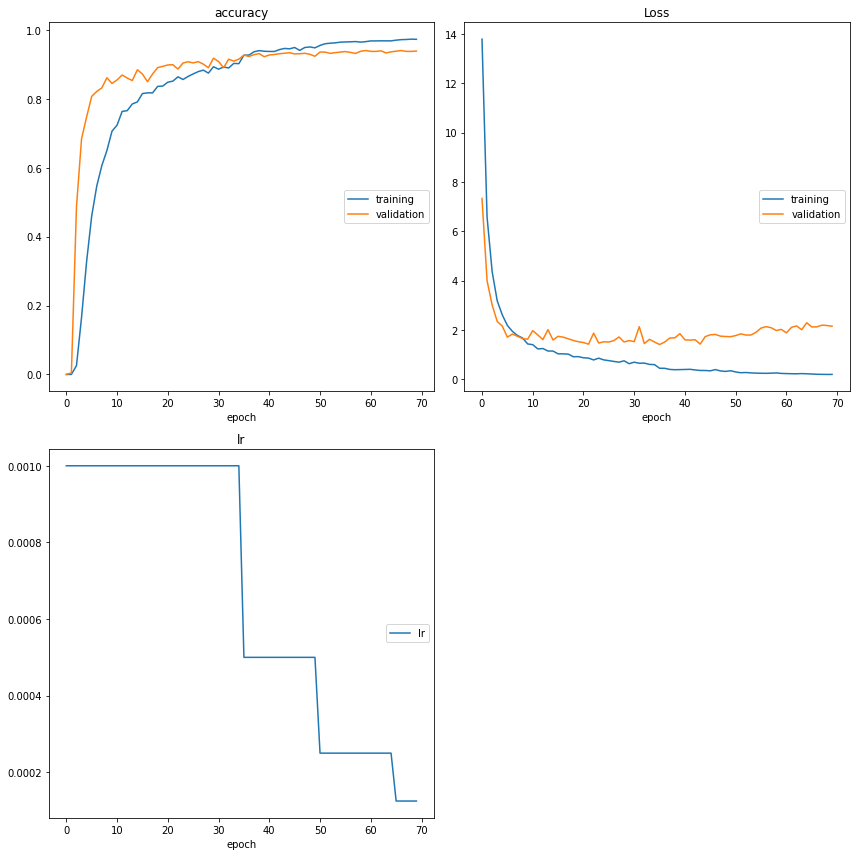

accuracy
	training         	 (min:    0.000, max:    0.974, cur:    0.973)
	validation       	 (min:    0.000, max:    0.941, cur:    0.939)
Loss
	training         	 (min:    0.202, max:   13.786, cur:    0.204)
	validation       	 (min:    1.413, max:    7.332, cur:    2.155)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
Epoch 00070: early stopping
Model take 3363.445853471756 S to train 


In [ ]:
history = sr_ctc.fit(X_train, train_labels, train_input_length, train_label_length, y_train,
                     X_val, val_labels, val_input_length, val_label_length, y_val)

In [ ]:
date = '12-06-2022'
model_name = 'CTC'

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


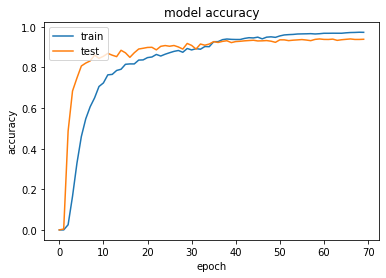

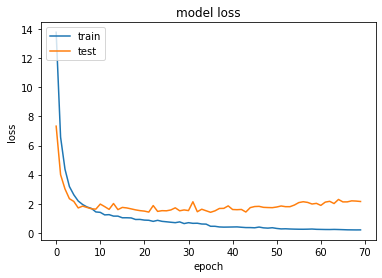

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#%% visualize training
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('{}_{}_accuracy.png'.format(model_name, date),bbox_inches='tight')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('{}_{}_loss.png'.format(model_name, date), bbox_inches='tight')
plt.show()

In [ ]:
y_hat = sr_ctc.str_out(X_val)

215/215 [==============================] - 2s 5ms/step


In [ ]:
print('PREDICTED: \t REAL:')
for i in range(10):
    print(y_hat[i], '\t\t',classes[y_val[i]])

PREDICTED: 	 REAL:
one''''' 		 one
eight''' 		 eight
zero'''' 		 zero
go'''''' 		 go
one''''' 		 one
sheila'' 		 sheila
tree'''' 		 tree
six''''' 		 six
six''''' 		 six
one''''' 		 one


In [ ]:
y_val

array([ 2, 21,  0, ...,  0,  9, 15])

In [ ]:
classes_index_rev = dict([(val, k) for k, val in classes_index.items()])
classes_index_rev

{'zero': 0,
 'right': 1,
 'one': 2,
 'stop': 3,
 'two': 4,
 'cat': 5,
 'four': 6,
 'on': 7,
 'bird': 8,
 'happy': 9,
 'bed': 10,
 'five': 11,
 'left': 12,
 'seven': 13,
 'no': 14,
 'off': 15,
 'marvin': 16,
 'dog': 17,
 'silence': 18,
 'wow': 19,
 'go': 20,
 'eight': 21,
 'tree': 22,
 'nine': 23,
 'yes': 24,
 'down': 25,
 'sheila': 26,
 'six': 27,
 'three': 28,
 'house': 29,
 'up': 30}

In [ ]:
import difflib

def get_close_word(y_hat, classes_index_rev):
    keys = list(classes_index_rev.keys())
    result = []
    for y in y_hat:
        y = y.replace("'", '')
        y = difflib.get_close_matches(y, keys)
        if not y:
            result.append(classes_index_rev["silence"])
            continue
        
        y = y[0]
        result.append(classes_index_rev[y])        
            
    return result

y_hat_clean = get_close_word(y_hat, classes_index_rev)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn
import pandas as pd


def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))

    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder],
                  columns = [i for i in label_encoder])
    plt.figure(figsize = (20,20))
    sn.heatmap(df_cm, annot=True)

    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder))

Accuracy:  0.9470622454915648
Precision::  0.9470622454915648
Recall::  0.9470622454915648
F1_Score::  0.9470622454915648

Macro precision_recall_fscore_support (macro) average
(0.9479793764404277, 0.9489039674368693, 0.9480419747194777, None)

Macro precision_recall_fscore_support (micro) average
(0.9470622454915648, 0.9470622454915648, 0.9470622454915648, None)

Macro precision_recall_fscore_support (weighted) average
(0.9482921733279563, 0.9470622454915648, 0.9473019380821809, None)

Confusion Matrix

Classification Report
              precision    recall  f1-score   support

        zero       0.99      0.95      0.97       250
       right       0.95      0.92      0.94       259
         one       0.96      0.93      0.95       248
        stop       0.99      0.98      0.98       249
         two       0.94      0.95      0.95       264
         cat       0.98      0.96      0.97       166
        four       0.97      0.93      0.95       253
          on       0.88      0.96  

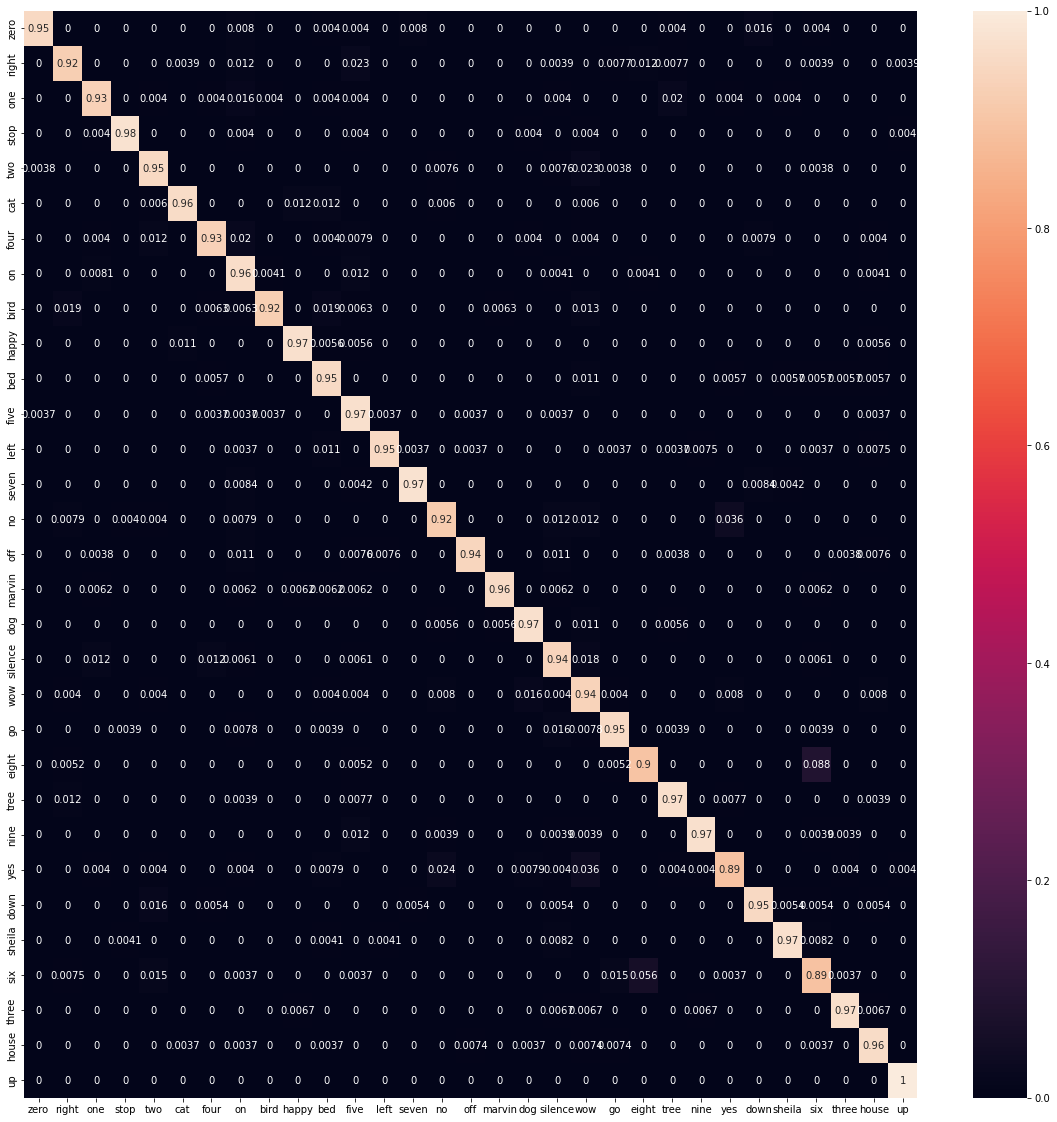

In [ ]:
print_score(y_hat_clean, y_val,classes_index_rev)

**Result Comparison**

**Language translator**

In the next step, I generated a model for translating a sentence using gtts just like how Siri converts the sound waves

In [ ]:
!pip install gtts
from gtts import gTTS 
from IPython.display import Audio
text_to_say = "Hey Siri, appelle le Dr. Shanker"
language = "fr"
gtts_object = gTTS(text = text_to_say,
                   lang = language,
                   slow = False) 
gtts_object.save("3.wav")
sound_file = '3.wav'
Audio(sound_file, autoplay=True) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install git+https://github.com/neuml/txtai#egg=txtai[pipeline]
from txtai.pipeline import Translation
translate = Translation()
translation = translate("Hey Siri, appelle le Dr. Shanker", "fr")
translation
translate(translation, "en")
text_to_translate = translate (translation, "en")

gtts_object_translate = gTTS(text = text_to_translate,
                   lang = language,
                   slow = False) 
gtts_object_translate.save("4.wav")
sound_file = '4.wav'
Audio(sound_file, autoplay=True) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/neuml/txtai to /tmp/pip-install-b5x3_m__/txtai_dab71d3e16bf411389b3255942082a22
  Running command git clone -q https://github.com/neuml/txtai /tmp/pip-install-b5x3_m__/txtai_dab71d3e16bf411389b3255942082a22
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


/usr/local/lib/python3.8/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Domain & Application

I picked up a dataset where it has 65,000 one-second-long utterances of 30 short words by thousands of different people. I wanted to test the accuracy of detecting the trigger word and then checking for the user's voice in a stream of instantaneous waveforms. And from what I learned, Siri transforms our command at a rate of 16000 waveform samples per second. 
A spectrum analysis stage converts the waveform sample stream to a sequence of frames, each describing the sound spectrum of approximately 0.01 sec. About twenty of these frames at a time (0.2 sec of audio) are fed to the acoustic model. Finally, a Deep Neural Network (DNN) converts each of these acoustic patterns into a probability distribution over a set of speech sound classes used in the "Hey Siri" phrase, plus silence and other speech, for a total of about 20 sound classes.

This is then forwarded to generating labeled training data and a self-supervised model. It keeps updating the errors from the text-to-speech outputs. I used the audio data to test to connect the sigmoid layers to perform temporal integration with the soundwaves into an acoustic pattern. Almost all the computation in the "Hey Siri" detector is in the acoustic model. The temporal integration computation is relatively cheap, so we disregard it when assessing size or computational resources. 

The final application was with Keras. Keras worked with data recognition, converting the waveform patterns and uniquely labeling every data point. I tried to test the performance of the present speech-to-text model that relies upon the hyperparameters used in the dataset. It shows that DNN can model raw and tonal speech signals through Siri with existing recognition systems. I wanted to see how it will convert each sound wave of the acoustic model into spectrograms to visualize the transformation of processing the input trigger words. 

Technique

Speech recognition 

I used it to recognize multiple words. Siri basically works with two main technologies - Voice Recognition and NLP(Natural Language Processing) integrated with Machine Learning. Speech recognition software can translate spoken words into text using closed captions to enable a person with hearing loss to understand what others are saying. I used speech recognition to enable trigger words for those with limited use of their hands to work with computers, using voice commands instead of typing. The Speech recognition package helped translate spoken words in French into text using closed captions to enable a person to understand what others are saying. Speech recognition helped me visualize and test audio files and translate them through gtts.


Trigger word detection 

Similar to our first assignment on movie reviews, I tried to find the accuracy in the answers to users' questions. Here we say positive and negative examples of failed attempts. First, I labeled training data to train our model. In the data set, there was a record of 10 seconds of audio clips of people saying positive "Hey Siri" in this case and negative (words that are not "Hey Siri") examples and labels manually when the people spoke the trigger words. Labeling the data manually is complex and time-consuming. Instead, the training data is generated artificially. We would then need three audio clips: 1. Positive examples of people saying the word "Hey Siri," 1 or 2 seconds each, 2. Negative examples of people saying random words, 1 or 2 seconds each 3. Background noise, for example, coffee shop or office, 10 seconds each. The training data we have generated need to be preprocessed before sending it to a machine-learning model. Due to the variation of air pressure, sound can be produced. The input data to the model is the spectrogram for each generated audio, due to which the target will be the labels created earlier. In recent years, Deep Learning (DL) has occupied increasing attention within the industry and academic world for its high performance in various domains. 

TensorFlow  

The heart of this project. I used TensorFlow to catch sound waves. This project aims to load a wav file with TensorFlow and generate a spectrogram to look at the audio accuracy. Then, I used it to convert audio files(.wav) to spectrograms. The spectrogram is a concise 'snapshot' of an audio wave, and since it is an image, it is well suited to being input to DNN-based architectures developed for images, but I used for audio classification. Spectrogram chops up the duration of the sound signal into smaller time segments and then applies a transformation to each segment to determine the frequencies contained in that segment. It then combines the Transforms for all those segments into a single plot. 

Classifier inception 

An inception module is an image model block that aims to approximate an optimal audio sparse structure in a DNN. It allowed me to use multiple types of filter sizes in a single voice record instead of being restricted to a single filter size, which we then concatenate and pass onto the next layer during convolution. In addition, I found it to give me the highest accuracy in classification. 

Tested convolution layers

I used a stacked 1D convolutional neural network for end-to-end small-footprint voice trigger detection in a streaming scenario. Voice trigger detection is an important speech application for users to activate their devices by simply saying a keyword or phrase. This model consists of a 1D convolution layer followed by a depth-wise 1D convolution layer. We can see that it can be expressed as a special case of the 1D convolution layer. From what I read, the state-of-the-art algorithm published uses Convnet, so I think Siri uses a similar approach. Although Apple began to publish recently, I did not see any publications about Siri. The possibility that they have a very different approach is pretty low because the original team left Apple and started a company. I did not see any big difference in their approach.

Assigned weights and normalization

I used batch normalization to adapt speech data in the dataset's amplitude, frequency, and time domains. I faced a problem with the split in train data and the need for normalization for the time domain. To work on this, I labeled the data to make a tractable exact computation of the sequence-level normalization. I assigned weights to balance and bridge the missing words and the noise. From there, I went on to find the model accuracy, loss, precision, and recall. 

Translation – a basic transformation of sound waves from get text to speech(gtts)

I used a simple model to translate language with the trigger and wake words. Basically, this idea was to show how Siri operated and converts the input language with a simple "translate" command. For example, I translated French to English using gtts. 

Development

Change the balance between two kinds of error by changing the activation threshold.
During development we try to estimate the system's accuracy by using a large test set, which is quite expensive to collect and prepare but essential. There is "positive" data and "negative" data. The "positive" data does contain the target phrase. You might think that we could use utterances picked up by the "Hey Siri" system, but the system doesn't capture the attempts that failed to trigger, and we want to improve the system to include as many of such failed attempts as possible. These are early development models. We then estimate the accuracy and observe the positive or negative result. If we get a negative result, we get back to including the failed attempts. These failed attempts are sent back to the database and tested with the train data. 

False detection and false wakes 

We compare the score with a threshold to decide whether to activate Siri. In fact, the threshold is not a fixed value. We built some flexibility to make it easier to activate Siri in difficult conditions while not significantly increasing the number of false activations. There is a primary, or normal threshold and a lower threshold that does not normally trigger Siri. If the score exceeds the lower threshold but not the upper threshold, we may have missed a genuine "Hey Siri" event. When the score is in this range, the system enters a more sensitive state for a few seconds, so that if the user repeats the phrase, even without making more effort, then Siri triggers. This second-chance mechanism improves the system's usability significantly, without increasing the false alarm rate too much because it is only in this extra-sensitive state for a short time. Even if there are any occurrences of the target phase - they are labeled and stored in the negative data. The model does not count them as errors. 



Conclusion

Data synthesis is an effective way to create a large training set for speech problems
In practice, selecting appropriate phone segments and joining them together is not easy, because the acoustic characteristics of each phone depend on its neighboring phones and the prosody of speech, which often makes the speech units incompatible with each other. Using the symbolic linguistic representation created by the text analysis module, the prosody generation module predicts values for acoustic features, such as intonation and duration. These values are used to select appropriate units. The task of unit selection has high complexity, so modern synthesizers use machine learning methods that can learn the correspondence between text and speech and then predict the values of speech features from the feature values of unseen text. 

This model must be learned at the training stage of a synthesizer using a large amount of text and speech data. The input to the prosody model are the numerical linguistic features, such as, phone identity, phone context, and syllable, word, and phrase-level positional features converted into convenient numerical form. The model's output is composed of the numerical acoustic features of speech, such as spectrum, fundamental frequency, and phone duration. At synthesis time, the trained statistical model is used to map from the input text features into speech features, which are then used to guide the unit selection backend process where appropriate intonation and duration are crucial. 


An end-to-end deep learning approach 

The DNN consists mostly of matrix multiplications and logistic nonlinearities. Each "hidden" layer is an intermediate representation discovered by the DNN during its training to convert the filter bank inputs to sound classes. On iPhone, we use two networks one for initial detection and another as a secondary checker. The initial detector uses fewer units than the secondary checker.

The output of the acoustic model provides a distribution of scores over phonetic classes for every frame. A phonetic class is typically like "the first part of an /s/ preceded by a high front vowel and a front vowel. We then process the audio data asynchronously from the input audio streaming to avoid breaking audio streaming.

A sliding/moving input window is an effective way to reduce delay. The acoustic framework shows the pain points to decide how to move the inputs into the model to help reduce the time spent processing the text-to-speech data. Also, the other thing I learned was about NLP. 
This natural language processing allows computers to be able to answer questions, extract information, analyze sentiment, and make predictions based on the context of the phrase we input. Machine learning and natural language processing technologies are at the core of voice assistants and through these revolutionary advancements, we need to improve the integration of deep neural networks can significantly enhance the speaker vector generation process. 



Contribution

Speech Vs. Sound

I wanted to develop my own kind of model that explains what is happening inside our devices. From where is the data coming, how is it processed, and how accurate this is? Starting from this point, the trigger word detection, I understood the concept of acoustic voice patterns and how sound waves are transformed into spectrograms. Trigger word detection is important as the entry point of user communication. This training process produces estimates of the probabilities of the phones. It states given the local acoustic observations, but those estimates include the frequencies of the phones in the training set. This may be very uneven and have little to do with the circumstances in which I will use the detector, so we compensate for the priors before the acoustic model outputs are used.

Like in the data set where we had 65000 different words, one word can sound similar to another, which could have an entirely different meaning. And this is prone to a bigger error when transforming the speech to text. For this, I wanted to understand the background of acoustic models. It is created by taking audio recordings of speech and their transcriptions and then compiling them into statistical representations of the sounds for words. The other component is called a language model, which gives the probabilities of sequences of words. The acoustic model typically deals with the raw audio waveforms of human speech, predicting what phoneme each waveform corresponds to, typically at the character or subword level.

I also tried to use a model generalization of different words and noise. We typically think of machine learning models as modeling two parts of the training data, the underlying audio signal and the randomness specific to that dataset, the noise. Fitting both of those parts increases training set accuracy, but fitting the signal also increases test set accuracy, while fitting the noise decreases both. So I used batch normalization, dropout, and similar techniques to make it harder to fit the noise and more likely to fit the signal. Increasing the amount of noise in the training data is one such approach, but it seems unlikely to be as useful. Finally, I tried to compare random noise to the model and reset the model multiple times to reprocess the dataset. I tried to use this technique to compare and contrast my results with and without noise.

In this part, we identify supervised and unsupervised audio classes. I used supervised audio classification to develop a common audio-based platform for highlight extraction that works across 65000 commonly used words. Then I used a heuristic to identify noise and adjust the trigger word accuracy and the output. I tried a combination of unsupervised and supervised learning approaches to replace the heuristic model. The proposed unsupervised framework mines the audio wav labels to detect the "Hey Siri" wake word.

Importance of product effectiveness and accessibility - people use Apple's accessibility features to personalize how they interact with their devices in ways that work for them. An accessible voice assistant supports accessibility personalization’s by design and gives everyone a great user experience, regardless of their capabilities or how they use their devices. I think getting the updated features that perform their best will change the product's effectiveness and reputation.


Next steps

TWD + Gender + Genre + Location + Translate

I want to test all these factors I could add to the voice assistant model. As I thought about voice detection, gender classification came into my mind. The first step for that was the accuracy of TWD. Once I find a significant use of DNN in defining and explaining this model, I would move forward with gender. Gender detection is a sensitive topic and I am skeptical because it can falsely detect the inputs. Some of the samples may have a deep voice and could be misclassified as the opposite gender. Having said that, I refrain from trying gender detection. 
My next step in building this project was to find the location of this device based on the Find My feature through Siri. If I am able to come up with a DNN model, I would then expand to find the type of questions the user would ask from a specific place. I am highly interested in making a hypothesis and linking the location and the genre of questions. So let's see where it takes me! 


Question asked during the presentation

Q - Out of all the speech recognitions out there, why did you choose only Siri? 

I chose Siri for my Trigger Word Detection Project because it is the most used voice assistant in the world. I wanted to see the accuracy of this voice recognition system for one more reason - Google assistant claims it is better than Siri. I just gave a shot on this to see where it lagged behind. Out of all the trigger words, if the false wakes are minimized, I think Siri will be in a better shape. 


Appendix

Deep learning for siri's voice: On-device deep mixture density networks for hybrid unit selection synthesis. Apple Machine Learning Research. (n.d.). Retrieved December 13, 2022, from https://machinelearning.apple.com/research/siri-voices 
Doshi, K. (2021, May 21). Audio deep learning made simple (part 2): Why Mel Spectrograms perform better. Medium. Retrieved December 13, 2022, from https://towardsdatascience.com/audio-deep-learning-made-simple-part-2-why-mel-spectrograms-perform-better-aad889a93505 
Hall, Z. (2017, October 18). Apple explains how 'hey Siri' works using a deep neural network and machine learning. 9to5Mac. Retrieved December 7, 2022, from https://9to5mac.com/2017/10/18/how-hey-siri-works/
Hey Siri: An on-device DNN-powered voice trigger for Apple's personal assistant. Apple Machine Learning Research. (n.d.). Retrieved December 13, 2022, from https://machinelearning.apple.com/research/hey-siri 
Inc., A. (n.d.). Human interface guidelines. Human Interface Guidelines - Human Interface Guidelines - Design - Apple Developer. Retrieved December 13, 2022, from https://developer.apple.com/design/human-interface-guidelines/guidelines/overview 
Levy, S. (2016, August 24). An exclusive look at how AI and machine learning work at Apple | Backchannel. Wired. Retrieved December 7, 2022, from https://www.wired.com/2016/08/an-exclusive-look-at-how-ai-and-machine-learning-work-at-apple/
Lutkevich, B., & Kiwak, K. (2021, September 13). What is speech recognition? Customer Experience. Retrieved December 13, 2022, from https://www.techtarget.com/searchcustomerexperience/definition/speech-recognition 
Manankshastri. (n.d.). Build software better, together. GitHub. Retrieved December 13, 2022, from https://github.com/manankshastri/Trigger-Word-Detection/projects 
Personalized hey Siri. Apple Machine Learning Research. (n.d.). Retrieved December 7, 2022, from https://machinelearning.apple.com/research/personalized-hey-siri
Quora insincere questions classification. Kaggle. (n.d.). Retrieved December 7, 2022, from https://www.kaggle.com/competitions/quora-insincere-questions-classification/rules

Saini, K. (2019, September 16). Natural language processing ft. Siri. Medium. Retrieved December 13, 2022, from https://medium.com/mytake/natural-language-processing-ft-siri-2bc7b854a2a3 
Sanger. (n.d.). DPL-425 - as an R&D scientist I would like add hi-C quants to quanthub to automate the process to reduce the time and effort taken to perform quants, persist the quants, support the pooling and reduce the chances for errors · issue #169 · Sanger/quanthub. GitHub. Retrieved December 13, 2022, from https://github.com/sanger/quanthub/issues/169 
Sharma, A. (2020, June 2). Behind hey Siri: How Apple's AI-powered personal assistant uses DNN. Analytics India Magazine. Retrieved December 7, 2022, from https://analyticsindiamag.com/behind-hello-siri-how-apples-ai-powered-personal-assistant-uses-dnn/
Speech recognition - human car interaction. (n.d.). Retrieved December 13, 2022, from http://humancarinteraction.com/speech-recognition.html 
Speech recognition using Deep Learning on Intel® Architecture. Intel. (n.d.). Retrieved December 13, 2022, from https://www.intel.com/content/www/us/en/developer/articles/technical/speech-recognition-using-deep-learning-on-intel-architecture.html 
TensorFlow speech recognition challenge. Kaggle. (n.d.). Retrieved December 7, 2022, from https://www.kaggle.com/competitions/tensorflow-speech-recognition-challenge
Writer, G. (2022, May 4). Emotional AI: Are algorithms smart enough to decipher human emotions? IoT For All. Retrieved December 13, 2022, from https://www.iotforall.com/emotional-ai-are-algorithms-smart-enough-to-decipher-human-emotions 


